# Bibliotecas 

In [2]:
!pip install python-bcb

In [20]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from bcb import sgs
import matplotlib.pyplot as plt


# Dados

In [47]:
# Importar dados
tabela = sgs.get(
    codes = {"ipca": 433,
             "const_empl": 28770,
             "commer_empl": 28771,
             "financial_empl": 28776},
    start= "2010-01-01",
    end= "2024-05-01"
)
tabela.head()

,ipca,const_empl,commer_empl,financial_empl
Date,,,,
2010-01-01,0.75,2181133.0,7000217.0,811481.0
2010-02-01,0.78,2227256.0,7021417.0,814275.0
2010-03-01,0.52,2279041.0,7063125.0,817444.0
2010-04-01,0.57,2329774.0,7115389.0,821314.0
2010-05-01,0.43,2380684.0,7171936.0,826496.0


In [48]:
tabela_treino, tabela_teste = train_test_split(tabela,
                                               train_size= 0.7,
                                               test_size = 0.3,
                                               random_state=1984)
print(tabela_treino.tail())
print(tabela_teste.tail())

            ipca  const_empl  commer_empl  financial_empl
Date                                                     
2010-09-01  0.45   2553013.0    7399034.0        848630.0
2023-11-01  0.28   2824856.0   10256535.0       1058501.0
2016-01-01  1.27   2477657.0    8827369.0        942528.0
2012-02-01  0.45   2861160.0    8137543.0        903968.0
2019-04-01  0.57   2027688.0    8796968.0        946387.0
            ipca  const_empl  commer_empl  financial_empl
Date                                                     
2024-02-01  0.83   2829314.0   10224439.0       1063928.0
2017-02-01  0.33   2080126.0    8616806.0        922834.0
2011-02-01  0.80   2585367.0    7687144.0        870025.0
2010-10-01  0.75   2574479.0    7494264.0        853111.0
2016-10-01  0.26   2236784.0    8656528.0        935874.0


In [49]:
column_names = tabela_treino.columns
print(column_names.tolist())

['ipca', 'const_empl', 'commer_empl', 'financial_empl']


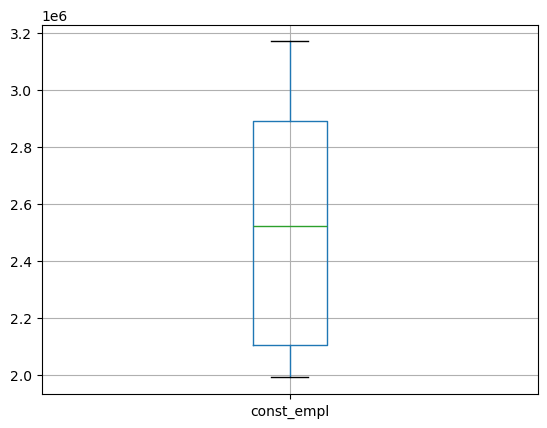

In [50]:
# Boxplot para verificar Outliers 
tabela_treino.boxplot("const_empl")
plt.show()

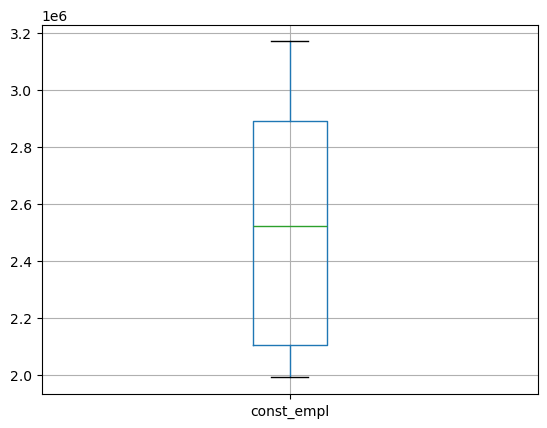

In [52]:
# Remoção de Outliers
quantiles = tabela_treino.const_empl.quantile([0.25,0.75])
iqr = quantiles[0.75] - quantiles[0.25]

tabela_treino.query(
    "not const_empl< @quantiles[0.25] -1.5 * @iqr and not const_empl > @quantiles[0.25] + 1.5 * @iqr"
).boxplot("const_empl")
plt.show()

In [53]:
tabela_treino.const_empl.agg(lambda x: x.isna().sum() / x.shape[0])

0.008333333333333333

Estatísticas Descritivas 

In [54]:
tabela_treino.const_empl.describe()

count    1.190000e+02
mean     2.537072e+06
std      4.017810e+05
min      1.990790e+06
25%      2.105864e+06
50%      2.520551e+06
75%      2.890302e+06
max      3.169971e+06
Name: const_empl, dtype: float64

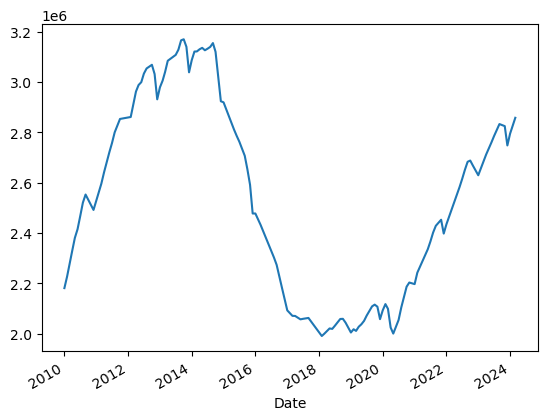

In [55]:
tabela_treino.const_empl.plot()
plt.show()